# Sunny Bhati

## sbhati

In [1]:
import librosa
from librosa import display
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cmath
import seaborn as sns
import scipy
import IPython.display as ipd
import math
from numpy.linalg import inv

## Inserting the files

In [2]:
x_ica_1, sr1 = librosa.load("x_ica_1.wav",sr=None)
x_ica_2, sr2 = librosa.load("x_ica_2.wav",sr=None)
x_ica_3, sr3 = librosa.load("x_ica_3.wav",sr=None)
x_ica_4, sr4 = librosa.load("x_ica_4.wav",sr=None)
x_ica_5, sr5 = librosa.load("x_ica_5.wav",sr=None)
x_ica_6, sr6 = librosa.load("x_ica_6.wav",sr=None)
x_ica_7, sr7 = librosa.load("x_ica_7.wav",sr=None)
x_ica_8, sr8 = librosa.load("x_ica_8.wav",sr=None)
x_ica_9, sr9 = librosa.load("x_ica_9.wav",sr=None)
x_ica_10, sr10 = librosa.load("x_ica_10.wav",sr=None)
x_ica_11, sr11 = librosa.load("x_ica_11.wav",sr=None)
x_ica_12, sr12 = librosa.load("x_ica_12.wav",sr=None)
x_ica_13, sr13 = librosa.load("x_ica_13.wav",sr=None)
x_ica_14, sr14 = librosa.load("x_ica_14.wav",sr=None)
x_ica_15, sr15 = librosa.load("x_ica_15.wav",sr=None)
x_ica_16, sr16 = librosa.load("x_ica_16.wav",sr=None)
x_ica_17, sr17 = librosa.load("x_ica_17.wav",sr=None)
x_ica_18, sr18 = librosa.load("x_ica_18.wav",sr=None)
x_ica_19, sr19 = librosa.load("x_ica_19.wav",sr=None)
x_ica_20, sr20 = librosa.load("x_ica_20.wav",sr=None)

### Preparing the data

In [3]:
datamatrix_problem1=np.vstack((x_ica_1,x_ica_2,x_ica_3,x_ica_4,x_ica_5,x_ica_6,x_ica_7,x_ica_8,x_ica_9,x_ica_10,x_ica_11,x_ica_12,x_ica_13,x_ica_14,x_ica_15,x_ica_16,x_ica_17,x_ica_18,x_ica_19,x_ica_20))

### Calculating the covariance matrix and the eigen_values

In [4]:
from numpy import linalg as LA
covariance_matrix_problem1=np.matmul(datamatrix_problem1,datamatrix_problem1.transpose())/len(datamatrix_problem1[0])

In [5]:
eigenvalues_problem1,eigenvector_problem1=np.linalg.eig(covariance_matrix_problem1)

Upon observing the eigenvalues, it is observed that the maximum variance is observed by the first five eigenvalues. Therefore, we will select the first five eigenvalues.

### Taking the first 4 eigenvalues and their correponding eigenvectors

In [6]:
eigenvector_problem1=eigenvector_problem1[:,0:4]
eigenvalues_problem1 = eigenvalues_problem1[0:4]
eigenvalues_problem1=[math.sqrt(x) for x in eigenvalues_problem1]

### Lambda inverse

In [7]:
lamdamatrix=np.zeros((4,4))

In [8]:
for i in range(len(lamdamatrix)):
    for j in range(len(lamdamatrix[0])):
        if i==j:
            lamdamatrix[i][j]=eigenvalues_problem1[i]
    

In [9]:
lamdainverse=inv(lamdamatrix)

### PCA whitening

In [10]:
PCA_1=np.matmul(lamdainverse,eigenvector_problem1.transpose())
Z=np.matmul(PCA_1,datamatrix_problem1)

In [11]:
print(Z.shape)

(4, 76800)


### ICA Algorithm

In [12]:
W=np.random.rand(4,4)### Random initialization of W
rho=1e-7
o=[]
Y=np.matmul(W,Z)
err=[]
iterations=[]
for i in range(10000):
    dw=(np.identity(4)*len(datamatrix_problem1[0])-np.matmul(np.tanh(Y),(Y**3).transpose()))@W
    W_old=W
    W=W+rho*dw
    W_new=W
    Y=np.matmul(W,Z)
    er=np.linalg.norm(W_old)-np.linalg.norm(W_new)
    err.append(er)
    iterations.append(i)
    if(np.allclose(W_old,W_new,rtol=1e-04, atol=1e-04)):
        break



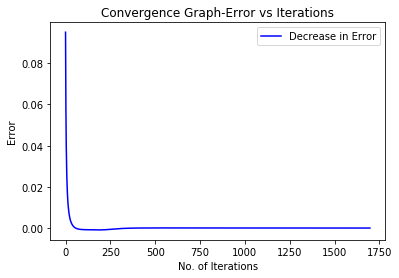

In [13]:
fig = plt.figure()
plt.plot( iterations,err,c='Blue',label='Decrease in Error')
plt.xlabel('No. of Iterations')
plt.ylabel('Error')
plt.title('Convergence Graph-Error vs Iterations')
plt.legend()
plt.show()

### Audio of 4 signals

In [14]:
ipd.Audio(Y[0], rate=16000)

In [15]:
ipd.Audio(Y[1], rate=16000)

In [16]:
ipd.Audio(Y[2], rate=16000)

In [17]:
ipd.Audio(Y[3], rate=16000)

# Problem 2

### Inserting the wave file

In [18]:
piano, sr1 = librosa.load("piano.wav",sr=None)
ocean,sr2=librosa.load("ocean.wav",sr=None)

In [19]:
ipd.Audio(piano, rate=16000)

In [20]:
ipd.Audio(ocean, rate=16000)

In [21]:
window_size=1024
pi= cmath.pi

In [22]:
def F_matrix(window_size):
    w=cmath.exp(-2j*pi/window_size)
    F_matrix = np.zeros((window_size,window_size),dtype=complex)
    for i in range(0,window_size):
        for j in range(0,window_size):
            F_matrix[i][j]= pow(w,i*j)
    return(F_matrix)

def specto(window_size,piano):
    a=0
    b=0
    data_matrix=[]
    hj=0
    while b < len(piano):
        empty_list=np.zeros(window_size,dtype='float64')
        hanningvalues=np.array(np.hanning(window_size))
        i=0
        for i in range (window_size):
            empty_list[i]=hanningvalues[i]*piano[a+i]
        data_matrix.append(empty_list)
        hj=hj+1

        a=int(a+(window_size/2))
        b=int(a+window_size)
    data_matrix1=np.array(data_matrix)
    data_matrixfinal=np.transpose(data_matrix1)
    FX=np.matmul(F_matrix(window_size),data_matrixfinal)
    return(FX)

In [23]:
S=specto(1024,piano)[0:513]

In [24]:
N=specto(1024,ocean)[0:513]

In [25]:
X_combination=S+N

In [26]:
def F_inverse(window_size):
    Finverse_matrix = np.zeros((window_size,window_size),dtype=complex)
    pi= cmath.pi
    w1=cmath.exp(2j*pi/window_size)
    for i in range(0,window_size):
        for j in range(0,window_size):
            Finverse_matrix[i][j]= 1/window_size*(pow(w1,i*j))
    return(Finverse_matrix)

In [27]:
def convert2timedomain(cd,window_size):
    X_transpose=np.transpose(cd)
    for i in range(1,len(X_transpose),1):
        for j in range(512):
            X_transpose[i][j]=X_transpose[i][j]+X_transpose[i-1][j+int(window_size/2)]  

    fgfh=np.array(X_transpose[0:len(X_transpose)-1,0:int(window_size/2)])
    ghj= np.array(X_transpose[len(X_transpose)-1,int(window_size/2):window_size],dtype='float64')
    fghjja=np.array(fgfh.flatten(),dtype='float64')
    gh1=list(fghjja)
    gh2=list(ghj)
    gh3=gh1+gh2
    gh4=np.array(gh3,dtype='float64')
    return(gh4)

## Ideal Mask (First Approach)

In [28]:
M=S/S+N
S_new=np.multiply(M,X_combination)
S_new_conjugate=np.conjugate(S)[::-1][1:512]
S_new_final=np.vstack((S_new,S_new_conjugate))
cd=(np.matmul(F_inverse(window_size),S_new_final).real)
print(cd)

[[ 0.17626293 -0.18614762 -0.05321402 ... -0.64733175  0.47329886
   0.34222258]
 [ 0.1703989  -0.14136536 -0.09295075 ... -0.66158386  0.60895917
   0.3232517 ]
 [ 0.16185832 -0.09459255 -0.13046845 ... -0.66791002  0.72917431
   0.30685629]
 ...
 [ 0.12988064 -0.2919545   0.04324767 ... -0.55484417  0.05048868
   0.36382698]
 [ 0.14590497 -0.2627636   0.00866595 ... -0.58216549  0.1881667
   0.36849027]
 [ 0.16545965 -0.2281243  -0.0212263  ... -0.61189044  0.32968922
   0.36038578]]


In [29]:
S_timedomain1=convert2timedomain(cd,window_size)
print(S_timedomain1)

[0.17626293 0.1703989  0.16185832 ... 0.36382698 0.36849027 0.36038578]


In [ ]:
ipd.Audio(S_timedomain1, rate=16000)

### Creating M BAR Matrix for Ideal Mask (Second Approach)

In [ ]:
M_bar=np.abs(S)**2/(np.abs(S)**2+np.abs(N)**2)
S_mbar=np.multiply(M_bar,X_combination)
S_conjugate_mbar=np.conjugate(S_mbar)[::-1][1:512]
S_final_mbar=np.vstack((S_mbar,S_conjugate_mbar))
cd_mbar=(np.matmul(F_inverse(window_size),S_final_mbar).real)

In [ ]:
S_timedomain2=convert2timedomain(cd_mbar,window_size)
print(S_timedomain2)

In [ ]:
ipd.Audio(S_timedomain2, rate=16000)

In [ ]:
piano_original_time_domain_list=piano[0:len(S_timedomain2)]

In [ ]:
def SNR(a,b):
    d=np.sum((a-b)**2)
    f=np.sum((a)**2)
    return(10*np.log10(f/d))

In [ ]:
print("The SNR value for the ideal mask is:",SNR(piano_original_time_domain_list,S_timedomain2))

### Ideal Binary Mask

### Creating Bft Matrix

In [ ]:
Bft=(abs(S)>abs(N)).astype(int)
print(Bft)

In [ ]:
S_ideal_binary=np.multiply(Bft,X_combination)

In [ ]:
S_ideal_binary_conjugate=np.conjugate(S_ideal_binary)[::-1][1:512]

In [ ]:
S_ideal_binary_final=np.vstack((S_ideal_binary,S_ideal_binary_conjugate))

In [ ]:
cd3=(np.matmul(F_inverse(window_size),S_ideal_binary_final).real)

In [ ]:
Piano_timedomain_ideal_binary=convert2timedomain(cd3,window_size)

In [ ]:
ipd.Audio(Piano_timedomain_ideal_binary, rate=16000)

In [ ]:
piano_final_ideal_binary=piano[0:len(Piano_timedomain_ideal_binary)]

In [ ]:
print("The SNR value for the ideal binary mask is:",SNR(piano_final_ideal_binary,Piano_timedomain_ideal_binary))

## Problem 3

In [ ]:
trs, sr1 = librosa.load("trs.wav",sr=None)
trn,sr2=librosa.load("trn.wav",sr=None)
x_nmf,sr3=librosa.load("x_nmf.wav",sr=None)

In [ ]:
ipd.Audio(trs, rate=sr1)

In [ ]:
ipd.Audio(trn, rate=sr2)

In [ ]:
ipd.Audio(x_nmf, rate=sr3)

In [ ]:
S=specto(1024,trs)[0:513]
absolute_S=np.abs(S)

In [ ]:
N=specto(1024,trn)[0:513]
absolute_N= np.abs(N)

In [ ]:
x_nmf1=specto(1024,x_nmf)[0:513]
nmf1_absolute=np.abs(x_nmf1)
np.random.seed(1)

In [ ]:
def NMFmodel(A,no_of_basis_vectors):
    np.random.seed(1)
    Ws=np.random.rand(len(A),no_of_basis_vectors)
    Hs=np.random.rand(no_of_basis_vectors,len(A[0]))
#     Ws=np.ones((len(A),no_of_basis_vectors))*1000
#     Hs=np.ones((no_of_basis_vectors,len(A[0])))*50
    obj= 0.5* np.trace((A-Ws.dot(Hs)).T.dot(A-Ws.dot(Hs)))
    for i in range(100000):
        Hs=Hs * (np.dot(Ws.T,A)/(Ws.T.dot(Ws).dot(Hs)))
        Ws=Ws*(np.dot(A,Hs.T))/(Ws.dot(Hs).dot(Hs.T))
        obj1=0.5* np.trace((A-Ws.dot(Hs)).T.dot(A-Ws.dot(Hs)))
        if np.allclose(obj,obj1, rtol=1e-7,atol=1e-7):
            print(abs(obj-obj1),i)
            break
        else:
            obj=obj1
    return(Ws,Hs)

In [ ]:
Wn,Hn=NMFmodel(absolute_N,30)

In [ ]:
Ws,Hs=NMFmodel(absolute_S,30)

In [ ]:
def NMFmodel1(A,WsWn):
    Hs=np.random.rand(len(WsWn[0]),len(A[0]))
    obj= 0.5* np.trace((A-WsWn.dot(Hs)).T.dot(A-WsWn.dot(Hs)))
    for i in range(10000):
        Hs=Hs * (np.dot(WsWn.T,A)/(WsWn.T.dot(WsWn).dot(Hs)))
        obj1=0.5* np.trace((A-WsWn.dot(Hs)).T.dot(A-WsWn.dot(Hs)))
        if np.allclose(obj1, obj, rtol=1e-4,atol=1e-7):
            break
        else:
            obj=obj1
    return(Hs)

In [ ]:
WsWn=np.hstack((Ws,Wn))
print(WsWn.shape)

In [ ]:
HsHn=NMFmodel1(nmf1_absolute,WsWn)

In [ ]:
Phase_matrix=x_nmf1/np.abs(x_nmf1)

In [ ]:
Sestimation=Ws.dot(HsHn[0:30,:])
S_estimation1=np.multiply(Sestimation,Phase_matrix)
S_conjugate_estimation1=np.conjugate(S_estimation1)[::-1][1:512]
S_estimation1_final=np.vstack((S_estimation1,S_conjugate_estimation1))
cd_Sest=(np.matmul(F_inverse(window_size),S_estimation1_final).real)

In [ ]:
firstmask=convert2timedomain(cd_Sest,window_size)

In [ ]:
ipd.Audio(firstmask, rate=16000)

In [ ]:
Sestimation2=Sestimation/WsWn.dot(HsHn)
Sestimation3=np.multiply(Sestimation,x_nmf1)
S_conjugate_estimation12=np.conjugate(Sestimation3)[::-1][1:512]
S_estimation2_final=np.vstack((Sestimation3,S_conjugate_estimation12))
cd_Sest1=(np.matmul(F_inverse(window_size),S_estimation2_final).real)
print(cd_Sest1)

In [ ]:
secondmask=convert2timedomain(cd_Sest1,window_size)

In [ ]:
ipd.Audio(secondmask, rate=sr3)

Upon listening both the audio, the secondmask audio has better SNR ratio compared to the one obtained with phase matrix.

Mask used:
\begin{equation}\tilde{M}=\frac{W_{S} H_{(1: 30, :)}}{W_{S} H_{(1: 30, :)}+W_{N} H_{(31 , 60 , :)}}=\frac{W_{S} H_{(1: 30, :)}}{\left[W_{S} W_{N}\right] H}\end{equation}

The Ws and Hs in this problem were initialized with random values and the convergence condition is checked which is basically the change in the objective function which is the frobenius norm of ||X-W*H||^2.

## PROBLEM 4

In [ ]:
import scipy.io
eeg = scipy.io.loadmat('eeg.mat')

In [ ]:
x_train=eeg['x_train'] 
x_train.shape

In [ ]:
x_train=eeg['x_train'] 
xtest=eeg['x_te']
ytest=eeg['y_te']
ytrain=eeg['y_train']
ytest.shape
rank=[2,4,6,8,10,15,20] ## Different ranks
k_near=[4,7,10,12,15,20,25] ## Different k_nearest neighbors
flattened_y_train=list(ytrain.flatten())
flattened_y_test=list(ytest.flatten())

In [ ]:
Tr_matrix=np.empty((255,0)) ### Training X_matrix

## Converting the training signal into STFT

In [ ]:
for i in range(x_train.shape[2]):
    channel1=librosa.stft(x_train[:,0,i], n_fft = 64, hop_length=48, window='blackman')
    channel2=librosa.stft(x_train[:,1,i], n_fft = 64, hop_length=48, window='blackman')
    channel3=librosa.stft(x_train[:,2,i], n_fft = 64, hop_length=48, window='blackman')
    new_channel1=channel1[2:7,:].reshape(1,85)
    new_channel2=channel2[2:7,:].reshape(1,85)
    new_channel3=channel3[2:7,:].reshape(1,85)
    chanel=np.concatenate((new_channel1,new_channel2,new_channel3),axis=1)
    Tr_matrix=np.concatenate((Tr_matrix,chanel.T),axis=1)

In [ ]:
Test_matrix=np.empty((255,0)) #### Test X matrix

## Converting the Test signal into STFT

In [ ]:
for i in range(xtest.shape[2]):
    channel1=librosa.stft(x_train[:,0,i], n_fft = 64, hop_length=48, window='blackman')
    channel2=librosa.stft(x_train[:,1,i], n_fft = 64, hop_length=48, window='blackman')
    channel3=librosa.stft(x_train[:,2,i], n_fft = 64, hop_length=48, window='blackman')
    new_channel1=channel1[2:7,:].reshape(1,85)
    new_channel2=channel2[2:7,:].reshape(1,85)
    new_channel3=channel3[2:7,:].reshape(1,85)
    chanel=np.concatenate((new_channel1,new_channel2,new_channel3),axis=1)
    Test_matrix=np.concatenate((Test_matrix,chanel.T),axis=1)

In [ ]:
def sunny(Tr_matrix,Test_matrix,rank,k_nearest,flattened_y_test,flattened_y_train):
    W_tr,H_tr=NMFmodel(abs(Tr_matrix),rank)
    W_te,H_te=NMFmodel(abs(Test_matrix),rank)
    final_categories=[]
    accuracy_list=[]
    for i in range(len(H_te[0])):##28
        dis=[]
        for j in range(len(H_tr[0])):##112
            k=np.linalg.norm(H_tr[:,j]-H_te[:,i])
            dis.append(k)
        sorted_dist_comingfromwhichcolumn=list(np.argsort(dis)[0:k_nearest])
        listofcategoriesfora_i_point=[flattened_y_train[i] for i in sorted_dist_comingfromwhichcolumn]
        if (listofcategoriesfora_i_point.count(1)) > (listofcategoriesfora_i_point.count(2)):
            category=1
        else:
            category=2
        
        final_categories.append(category)
        
        if category==flattened_y_test[i]:
            flag=1
        else:
            flag=0
        accuracy_list.append(flag)
         
    final_accuracy=np.sum(accuracy_list)/len(accuracy_list)
    return(np.float(final_accuracy))

In [ ]:
list_of_table=np.zeros((len(k_near),len(rank)))
for i in range(len(k_near)):
    for j in range(len(rank)):
        list_of_table[i][j]=sunny(Tr_matrix,Test_matrix,rank[j],k_near[i],flattened_y_test,flattened_y_train)

In [ ]:
print(list_of_table)

The best accuracy obtained was 64.285% for different combinations of k and rank (combination1:rank=6 and k=20, combination2: rank=15 and k=15. The Ws and Hs for both train and test were initialized with random values.I have printed out the best accuracy result and as seen the highest accuracy is for rank=20 and k=20.

Below are the values values that I got for different k and ranks:

<table>
  <thead>
    <tr>
      <th>K</th>
      <th>Accuracies for different ranks(2,4,6,8,10,15,20). The values are in decimals and need to be converted into %  by multiplying with 100</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>4</td>
      <td>[0.39, 0.5, 0.64, 0.3214, 0.3928, 0.5714, 0.4285]</td>
    </tr>
    <tr>
      <td>7</td>
      <td>[[0.5, 0.4642, 0.6428, 0.3571, 0.42857143, 0.53571429, 0.39285714]</td>
    </tr>
    <tr>
      <td>10</td>
      <td>[0.53571429, 0.46428571, 0.60714286, 0.42857143, 0.42857143, 0.57142857, 0.39285714]</td>
    </tr>
    <tr>
      <td>12</td>
      <td>[0.5, 0.5, 0.53571429, 0.39285714, 0.46428571, 0.53571429, 0.46428571]</td>
    </tr>
    <tr>
      <td>15</td>
      <td>[0.46428571, 0.53571429, 0.57142857, 0.32142857, 0.39285714, 0.64285714, 0.46428571]</td>
    </tr>
    <tr>
      <td>20</td>
      <td>[[0.35714286, 0.46428571, 0.60714286, 0.39285714, 0.39285714, 0.60714286, 0.39285714]</td>
    </tr>
    <tr>
      <td>25</td>
      <td>[0.42857143, 0.46428571, 0.53571429, 0.39285714, 0.42857143, 0.57142857, 0.39285714]</td>
    </tr>
      
  </tbody>
</table>